In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from proj1_helpers import *
from data_helpers import *
from cross_validation import *
from plots import *
from implementations import *

In [9]:
#LOAD TRAINING DATA
DATA_TRAIN_PATH = 'data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [10]:
jet_samples_training = get_jet_samples(tX)


In [11]:
y = y[jet_samples_training[2]]
x = tX[jet_samples_training[2]]


In [12]:
degrees = range(1,20)

k_fold = 4
acc_training = []
acc_validation = []
lambda_ = 1e-3
seed= 1
for degree in degrees:
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,_ = clean_data(x_train)
            x_val_clean,_ = clean_data(x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_)
            
            acc_tr = predict_accuracy (y_train, x_train_aug, w)
            acc_val = predict_accuracy (y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(degree, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))


1 73.34390221486996 73.31541218637993
2 76.93594338755628 76.8775847808106
3 79.21468615017002 79.07223600771988
4 80.27065527065527 80.11993382961126
5 80.44067640841835 80.27708850289496
6 80.62218546089514 80.38323683484973
7 81.54857090340961 81.26826578439481
8 82.5323959194927 82.26220016542598
9 82.88576417608675 82.64267990074441
10 82.92620163587905 82.64681555004135
11 83.01810495358882 82.74055693410531
12 83.18353092546641 82.88668320926386
13 83.26900101093649 82.97353184449958
14 82.78696810954875 82.43038323683484
15 77.38535061115707 77.22635787151916
16 79.00009190331771 69.29969671905157
17 80.98336549949454 72.7157430383237
18 79.27763992280121 69.83595257788807
19 73.23040161749839 65.113041080783


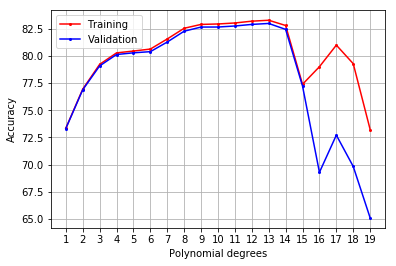

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(degrees, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.plot(degrees, acc_validation, label='Validation', marker = "o", markersize = 2, color = "blue")
plt.grid()
plt.legend()
plt.xticks(degrees)
plt.xlabel("Polynomial degrees")
plt.ylabel("Accuracy")
plt.show()
plt.savefig("build_poly_groupe_2_degre")

In [8]:
lambdas = np.logspace(-10,-1,10)

k_fold = 4
acc_training = []
acc_validation = []
degree = ?
seed= 1
for ind_lambda,lambda_ in enumerate(lambdas):
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_tr, y_tr, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            
            x_tr,_ = clean_data(x_tr)
            x_val,_ = clean_data(x_val)
            x_train, y_train = augment_data(x_tr, y_tr, degree)
            x_val, y_val = augment_data(x_val, y_val, degree)
            w,_ = ridge_regression (y_train, x_train, lambda_)
            
            acc_tr = predict_accuracy (y_train, x_train, w)
            acc_val = predict_accuracy (y_val, x_val, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(degree, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

TypeError: 'float' object cannot be interpreted as an integer